# Introduction

In this notebook, I explore some of the features of statsmodels package

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import statsmodels.api as sm

from statsmodels import tsa # time series analysis
from statsmodels import genmod # generalize linear models
from statsmodels import discrete # discrete choice models
from statsmodels import robust # robust linear models
from statsmodels import graphics # 
from statsmodels import nonparametric # plotting that requires some kind of calculation
from statsmodels import datasets # example datastes
from statsmodels import imputation
from statsmodels import stats # statistical tests like ANOVA

from ts.viz import set_mpl_style

set_mpl_style();

# models.Model

Most models are inherited from models.Model, which mainly has a fit and predict methods

In [3]:
from statsmodels.base.model import Model
help(Model)

Help on class Model in module statsmodels.base.model:

class Model(builtins.object)
 |  Model(endog, exog=None, **kwargs)
 |  
 |  A (predictive) statistical model. Intended to be subclassed not used.
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and

one thing to know is that when you call fit, it returns an instance of the `ModelResult` class, which contains information about the fitting (training) process.

# Datasets

statsmodels provide some handy example datasets. See some examples below

In [4]:
data = datasets.spector.load_pandas().data # some gpa and grade stuff
data.head(2)

,GPA,TUCE,PSI,GRADE
0,2.66,20.0,0.0,0.0
1,2.89,22.0,0.0,0.0


In [5]:
datasets.co2.DESCRSHORT

'Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.'

In [6]:
co2 = datasets.co2.load_pandas().data
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


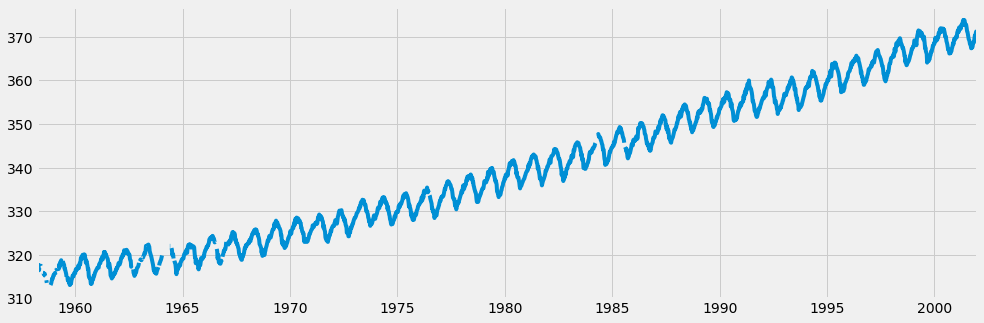

In [7]:
co2.co2.plot();

# Plots (graphics)
Here I look at some of the important plots related to Classical Time Series

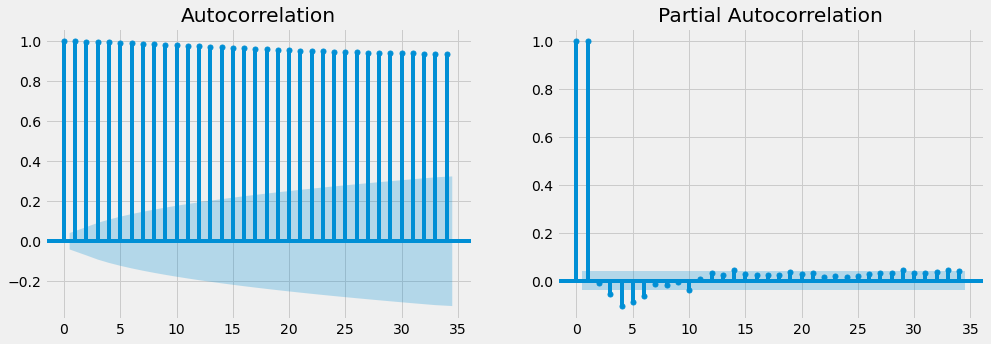

In [8]:
# import matplotlib to manage the sm plots
import matplotlib.pyplot as plt

# import plotting functions from graphics.tsaplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict, quarter_plot

# impute the co2 data and use it to try out some of these plots
co2_imputed = co2.co2.fillna(method='bfill')

# design the figure
fig, axs = plt.subplots(1, 2)
ax1, ax2 = axs

plot_acf(co2_imputed, ax=ax1);
plot_pacf(co2_imputed, ax=ax2);